# Part 3 - Predictions

In this part, we will compare several classification models to determine which one can predict the best the severity of an accident

## Data filtering

In [7]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Import the four csv files that we are going to use
df1 = pd.read_csv("./data/caracteristics.csv", encoding='latin-1')
df2 = pd.read_csv("./data/places.csv")
df3 = pd.read_csv("./data/users.csv")
df4 = pd.read_csv("./data/vehicles.csv")

# Merge all the dataframes together using the column 'Num_Acc' that they have in common
df1 = pd.merge(df1, df2, how="outer", on="Num_Acc")
df2 = pd.merge(df3, df4, how='outer', on="Num_Acc")

data = pd.merge(df1, df2, how='outer', on="Num_Acc")

data

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,an_nais,num_veh_x,senc,catv,occutc,obs,obsm,choc,manv,num_veh_y
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,1983.0,B02,0.0,7,0,0.0,0.0,1.0,1.0,B02
1,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,1983.0,B02,0.0,2,0,0.0,0.0,7.0,15.0,A01
2,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,2001.0,A01,0.0,7,0,0.0,0.0,1.0,1.0,B02
3,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,2001.0,A01,0.0,2,0,0.0,0.0,7.0,15.0,A01
4,201600000002,16,3,16,1800,1,2,6,1.0,6.0,...,1960.0,A01,0.0,7,0,6.0,0.0,1.0,1.0,A01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553971,200500087953,5,12,27,1500,1,2,3,2.0,5.0,...,1990.0,A01,0.0,7,0,0.0,2.0,3.0,19.0,B01
3553972,200500087953,5,12,27,1500,1,2,3,2.0,5.0,...,1990.0,A01,0.0,2,0,0.0,2.0,1.0,17.0,A01
3553973,200500087953,5,12,27,1500,1,2,3,2.0,5.0,...,1990.0,A01,0.0,7,0,0.0,2.0,1.0,1.0,C01
3553974,200500087954,5,12,31,2100,5,2,1,2.0,7.0,...,1951.0,A01,0.0,7,0,4.0,0.0,0.0,1.0,A01


Using the correlation matrix in the first part, we retain the features that are the most correlated to the accident's severity.

In [8]:
# Select the columns that we want to keep and we rename it appropriately
columns = ['catu', 'sexe', 'an_nais', 'secu', 'lum', 'atm', 'catr', 'surf', 'grav']

data = data[columns]
data.columns = ['User category', 'Sex', 'Year of birth', 'Security', 'Luminosity', 'Weather', 'Type of road', 'Road surface', 'Severity']

# Delete all rows for which one or more column is empty (NA)
data.dropna(axis=0, inplace=True)

# Rearrange the 'Severity' numbers in ascending order
data['Severity'].replace({2: 4, 4: 2}, inplace=True)

data.reset_index(drop=True, inplace=True)
data

,User category,Sex,Year of birth,Security,Luminosity,Weather,Type of road,Road surface,Severity
0,1,2,1983.0,11.0,1,8.0,3.0,1.0,1
1,1,2,1983.0,11.0,1,8.0,3.0,1.0,1
2,1,1,2001.0,21.0,1,8.0,3.0,1.0,3
3,1,1,2001.0,21.0,1,8.0,3.0,1.0,3
4,1,1,1960.0,11.0,1,1.0,3.0,1.0,3
...,...,...,...,...,...,...,...,...,...
3499067,1,1,1990.0,23.0,1,2.0,4.0,1.0,2
3499068,1,1,1990.0,23.0,1,2.0,4.0,1.0,2
3499069,1,1,1990.0,23.0,1,2.0,4.0,1.0,2
3499070,1,1,1951.0,13.0,5,2.0,2.0,2.0,2


## Comparison of the different classofication method

We will now divide the table into two parts: one for training the models and another for testing them. As we have a very large dataset, we choose the following distribution: 60% for training and 40% for testing.

In [4]:
X = data.drop(columns='Severity').copy()
y = data[['Severity']].copy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=1234)

print(X_train.shape, X_test.shape)

(2099443, 8) (1399629, 8)


Now that the data is separated, we test 4 different classification models: Logit, NBayes, LDA and QDA. Then, we plot the accuracy metrics of each method.

Name   Accuracy  Precision  Recall  F1_score
--------------------------------------------
Logit    0.481     0.427     0.481    0.394
NBayes   0.477     0.434     0.477    0.413
LDA      0.492     0.462     0.492    0.415
QDA      0.477     0.444     0.477    0.417


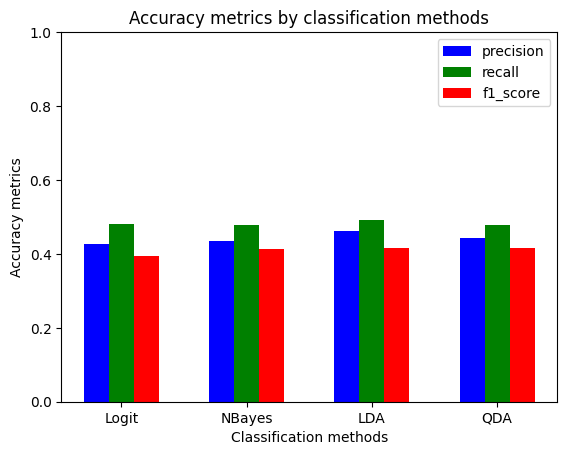

In [6]:
# Import necessary libraries
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

import sklearn.discriminant_analysis as DA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

# Disable the warnings in the output
from warnings import simplefilter
simplefilter(action='ignore')

# Define the names of the classifications method
names = ["Logit", "NBayes", "LDA", "QDA"]

# Define the classifiers
classifiers = [LogisticRegression(C=1e5),
               GaussianNB(), 
               DA.LinearDiscriminantAnalysis(),
               DA.QuadraticDiscriminantAnalysis()
]

# Write the head line of the table describing the accuracy of each method
print('Name   Accuracy  Precision  Recall  F1_score\n'+44*'-')

# Create a new figure for the histogram
plt.figure()

# Loop through all different classfication methods
for name, clf in zip(names, classifiers):

    # Predict the diagnosis using the classifier
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy metrics
    accuracy = accuracy_score(y_test,y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    # Print the classifier's name and its accuracy score
    print('{:6} {:7.3f} {:9.3f} {:9.3f} {:8.3f}'.format(name, accuracy, precision, recall, f1_score))

    # Create a bar in the histogram for each accuracy metrics
    plt.bar(names.index(name) - 0.2, precision, color='blue', width=0.2)
    plt.bar(names.index(name), recall, color='g', width=0.2)
    plt.bar(names.index(name) + 0.2, f1_score, color='r', width=0.2)

# Write the classification methods' names on the x axis
plt.xticks(range(len(names)), names)

# Add a xlabel, ylabel and title to the plot
plt.xlabel("Classification methods")
plt.ylabel("Accuracy metrics")
plt.title("Accuracy metrics by classification methods")

# Add the legend to the plot
plt.legend(["precision", "recall", "f1_score"])

# Increase the size of the plot so that the legend does not hide the metrics of the latest classification method.
plt.ylim(top=1)

# Show the plot
plt.show()

Thus, we observe that it is difficult to predict the severity of an accident because the correlations between the severity and the features we chose are too weak. However, the best classification model is Linear Discriminant Analysis (LDA), with a success rate of around 50%.